<a href="https://colab.research.google.com/github/supportchelsea/Simple-code/blob/master/bigdata_crawling%2Bword_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (75.0.3770.90-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [0]:
!pip install konlpy
!pip install customized_konlpy

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [0]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import datetime as dt
import urllib.parse
import re
from tqdm import tqdm_notebook
import sys
import pandas as pd
import numpy as np
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Okt
from ckonlpy.tag import Twitter

In [0]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


# Crawling

In [0]:

options = webdriver.ChromeOptions()
options.add_argument ('--headless')
options.add_argument ('--no-sandbox')
options.add_argument ('--disable-dev-shm-usage')

browser = webdriver.Chrome ( 'chromedriver' , options = options)

In [0]:
# 검색을 위한 변수 설정 
startdate=dt.date(year=2019,month=1,day=1)
untildate=dt.date(year=2019,month=1,day=2)
enddate = dt.date(year=2019,month=7,day=20)
keyword = urllib.parse.quote_plus("데이터%20분석")

In [0]:
# 트윗 클렌징을 위한 함수
def cleantweet(total_tweets_dict):
    keys = list(total_tweets_dict.keys())
    cleaned_tweet_dict = {}
  
    for key in keys:
        cleaned_tweet = []
        cleaned_tweet_dict[key] = []
        tweets_value = total_tweets_dict[key]
    
        for tweet in tweets_value:
            tmp = re.sub('<.+?>', '', str(tweet), 0).strip()
            tmp = re.sub('pic.+','',str(tmp),0).strip()
            tmp = re.sub('http?://\S+','',str(tmp),0).strip()
            tmp = re.sub(' https?://\S+','',str(tmp),0).strip()
            tmp = re.sub('\n','',str(tmp),0).strip()
            cleaned_tweet.append(tmp)

        cleaned_tweet_dict[key] += cleaned_tweet
    
    return cleaned_tweet_dict

In [0]:
daily_tweet = {}

for i in tqdm_notebook(np.arange(startdate,enddate)):

  daily_tweet[str(startdate)] = []

  url='https://twitter.com/search?l=ko&q='+keyword+'%20since%3A'+str(startdate)+'%20until%3A'+str(untildate)+'&src=typd'

  browser.get (url)

  html = browser.page_source
  soup=BeautifulSoup(html,'html.parser')

  lastHeight = browser.execute_script("return document.body.scrollHeight")

  while True:
    tweets=soup.find_all("p", {"class": "TweetTextSize"})

    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)

    newHeight = browser.execute_script("return document.body.scrollHeight")

    if newHeight > lastHeight:
      daily_tweet[str(startdate)] += tweets
    else:
      daily_tweet[str(startdate)] += tweets
      startdate=untildate
      untildate+=dt.timedelta(days=1)
      break

    lastHeight = newHeight

  if startdate.month != untildate.month:
    print(startdate.month)

1
2
3
4
5
6



In [0]:
cleaned_tweet_dict = cleantweet(daily_tweet)

In [0]:
data = pd.DataFrame.from_dict(cleaned_tweet_dict,orient='index')
data = data.transpose()

In [0]:
data.head(3)

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-12,2019-01-13,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-19,2019-01-20,2019-01-21,2019-01-22,2019-01-23,2019-01-24,2019-01-25,2019-01-26,2019-01-27,2019-01-28,2019-01-29,2019-01-30,2019-01-31,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,...,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,2019-06-18,2019-06-19,2019-06-20,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-03,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-11,2019-07-12,2019-07-13,2019-07-14,2019-07-15,2019-07-16,2019-07-17,2019-07-18,2019-07-19
0,게임 『아이돌마스터 신데렐라걸즈 스타라이트스테이지』의 SSR등급 카드 출시 패턴을 ...,"그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...","마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...",오 R이라는 데이터분석 전용 언어가 있네,정치적 사회심리학적 분석을 하더라도 그건 언론에서 할 일. 여론조사회사는 통계과학으...,검증된 데이터가 뒷받침되는 분석!,"그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...",검증된 데이터가 뒷받침되는 분석!,"마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...",검증된 데이터가 뒷받침되는 분석!,검증된 데이터가 뒷받침되는 분석!,"한주원역ㅋㅋㅋㅋㅋ 촬영장 분위기 무엇,,너무 좋잖아ㅋㅋㅋㅋ화기애애해ㅋㅋㅋㅋ헤이주원의...",문파분들의 특징을 나열해 본다.문재인 대통령만 지지조직화되지 않음시라소니 스타일로 ...,요즘 데이터 분야가 확대되면서 전문성 등에 대해 다들 생각하는 바가 다르고 분석가가...,"알리바바, 물류·유통 데이터 분석 솔루션 'A100' 공개 …",19. [유명 미디어 기업] 데이터분석 개발 (대리-과장급) …,"마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...",검증된 데이터가 뒷받침되는 분석!,유시민 알릴레오 구독자 데이터분석 해보니....구독자 60만 돌파.팟빵 10만.알릴...,"그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...","그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...","오늘 원예부를 습격한 침입범입니다만 , - 이전의 반교복 게릴라와 데이터가 일치합...",검증된 데이터가 뒷받침되는 분석!,내가 빨리한건지 인턴님이 엄청 느린건지난 데이터 분석 화면 다 만든것 같은데여기서 ...,"마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...","그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...","마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...",검증된 데이터가 뒷받침되는 분석!,데이터 분석 전문가가 가사 단어와 스포티파이 사운드 변수를 이용해서 가장 화난 데스...,"금융시장의 뉴스와 데이터, 분석 정보를 제공하는 미국의 미디어 그룹인 블룸버그@bu...","마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...","마소캠퍼스의 디지털마케팅&amp;데이터분석 40시간 동영상 강좌가 89,000원 지...",검증된 데이터가 뒷받침되는 분석!,검증된 데이터가 뒷받침되는 분석!,검증된 데이터가 뒷받침되는 분석!,검증된 데이터가 뒷받침되는 분석!,"닐슨코리아가 발표한 '한국 가정 간편식 소비자의 구매 행동보고서'에 따르면, 가정 ...",저 RT에 나온 예시의 데이터 분석가와 개발자의 싸움은 십중팔구 데이터 분석이니 뭐...,산업공학을 전공하는 사촌동생 녀석이 데이터 분석에 관심이 있다는데... 데이터 분석...,오후 2시에 시작한 금융데이터분석 오프라인 스터디모임이 지금 끝났다 다들열정이 뿜뿜...,...,구글이 지난주 분석 스타트업인 Looker를 26억불에 인수하자마자 세일즈포스가 데...,AWS 기반에서 지속 가능한 데이터 분석을 위해 노력한 글입니다. https://b...,"여성 데이터 분석가 양성 과정 데잇걸즈 3기가 드디어 모집을 시작했습니다!올 한해,...","파이썬, 가장 강력한 언어. 학교와 최신 실무기술은 다릅니다. 데이터과학, 빅데이터...","그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...","ㅋㅋㅋ뭐예요.. 그간 술 마시고 데이터 분석이 전혀 안되어 있다니,,, 주변인이 정...",최광웅 데이터정치경제연구원 원장의 분석은 눈여겨 볼만해. 방심하면 안돼! “막말 경...,검증된 데이터가 뒷받침되는 분석!,데이터 분석 회사인 Plaser는 위치 분석법을 사용하여 월마트가 매장을 폐쇄하는 ...,검증된 데이터가 뒷받침되는 분석!,야 앰냇ㅋㅋ 솔직하게 말해봐 시발ㅋㅋ그래서 투픽으로 견고한 사람이 누군데?ㅋㅋ너네 ...,"하지만 이곳은 지구가 아니죠, 뿅! 지구에서 관측하던 각도와 달라 데이터 분석이 어...",검증된 데이터가 뒷받침되는 분석!,#스마트요원 2019년도 영화 데이터 분석 보고서2019년 6월 2주차 데이터 갱신...,검증된 데이터가 뒷받침되는 분석!,의외로 일반화학실험 일반물리학실험 데이터가 실제 예상치에 근접하게 나와버리면 매우 ...,API 데이터는 수요일 늦게까지 에너지정보국 공급 데이터를 앞질렀다. S&amp;P...,"넷플릭스 공개 예정작 ""샤프트"" (6/28) | '샤프트' 5번째 시리즈. 몇 십년...",이러한 상황에서 실존하는 괴로움을 특정 데이터만으로 판단해 존재를 부정하는 건 그다...,"그리고 1주전.. 그 벌레 괴물이 나타났을 때, 저는 완전히 방심했었습니다. 그 미...","중학생때는 내가 바이섹슈얼이라고 생각했는데, 현재까지의 인생데이터를 분석해보면 호모...",[#통계청_퀴즈_이벤트]#SPSS #R #데이터분석 강의를 무료로 들을 수 있는 곳...,딱히 분석은 아니고 데이터 늘어놓고 뭐가 메이저나 판별하는 글인데 뭐가 재밌고 글빨...,교수가 하루종일 데이터 분석 관련해서 메일을 날려대다 (종일 수술중이라 답장은 죄다...,글데이터라..이거 상당히 방대한 작업인데 내 논문에 써먹을 수 있겠는데? 매일신보 ...,"nlp4kec - 한글, 영어, 중국어 텍스트 데이터를 형태소 분석 후 R tm p...",2019년 5월 4/21권- 비즈니스 인문학: 난 재밌었음- 나의 한국현대사: 매우...,검증된 데이터가 뒷받침되는 분석!,검증된 데이터가 뒷받침되는 분석!,** 같이 일을 할 데이터 분석가를 찾습니다. **ODK Media.라는 곳에서 저...,나는 정수정 능력치도 빨리 보여쥤으면 좋겠어...근데 장관때부터 박무진이 하는 수치...,넷플릭스 &lt;거대한 해킹&gt; 예고편. 2016년 미 대선 당시 페이스북 데이...,"상상속 블랙홀 포착, 韓연구진 관측·데이터분석 힘 보탰라영유아 백일해

In [0]:
tweet = [x  for v in cleaned_tweet_dict.values()for x in v]
unique_tweet = list(set(tweet))

In [0]:
len(unique_tweet)

1875

# Tokenize NLP

In [0]:
twitter = Twitter()
add_list = ['데이터 분석','데이터','빅데이터','4차 산업혁명','파이썬','텐서플로우','텐서','파이토치','딥러닝','머신러닝']
twitter.add_dictionary(add_list,'Noun')

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
def tokenize(df_name):

  list_corpus = []

  for date in df_name.columns:

    for unit in df_name[date].dropna().tolist():
        temp_corpus = twitter.pos(unit)
        temp_corpus = [tag[0] for tag in temp_corpus if tag[1]=='Noun' and len(tag[0])>1]
        list_corpus.append(temp_corpus)

  return list_corpus

In [0]:
corpus = tokenize(data)
corpus = [x for i in corpus for x in i]


In [0]:
corpus

['게임',
 '아이돌마스터',
 '신데렐라',
 '걸즈',
 '스타',
 '라이트',
 '스테이지',
 '등급',
 '카드',
 '출시',
 '패턴',
 '데이터',
 '분석',
 '결과',
 '오후',
 '신데렐라',
 '페스티벌',
 '종료',
 '직후',
 '가사',
 '리카',
 '등급',
 '카드',
 '출시',
 '가능성',
 '가장',
 '분석',
 '닐슨',
 '코리아',
 '발표',
 '한국',
 '가정',
 '간편식',
 '소비자',
 '구매',
 '행동',
 '보고서',
 '가정',
 '간편식',
 '관련',
 '판매',
 '데이터',
 '분석',
 '결과',
 '가장',
 '판매',
 '간편식',
 '냉동',
 '만두',
 '나타',
 '만두',
 '시대',
 '가오',
 '파이썬',
 '데이터',
 '분석',
 '서울',
 '제주',
 '도시',
 '공원',
 '파이썬',
 '데이터',
 '분석',
 '경기도',
 '도시',
 '공원',
 '파이썬',
 '데이터',
 '분석',
 '무슨',
 '데이터',
 '개념',
 '중국인',
 '학자',
 '데이터',
 '단순',
 '텍스트',
 '분석',
 '거의',
 '감흥',
 '그거',
 '사회과학',
 '학부',
 '생도',
 '신문',
 '기사',
 '오래',
 '기억',
 '안나',
 '의체',
 '인간',
 '의식',
 '원리',
 '인간',
 '는가',
 '인간',
 '의식',
 '데이터',
 '불가',
 '작품',
 '자하',
 '는가',
 '혼자',
 '머리',
 '리다',
 '에반게리온',
 '퍼시픽림',
 '비교',
 '분석',
 '선회',
 '읍니',
 '주전',
 '벌레',
 '괴물',
 '나타',
 '완전',
 '방심',
 '사이보그',
 '이외',
 '질리',
 '생각',
 '나머지',
 '적의',
 '데이터',
 '분석',
 '정면',
 '공격',
 '시작',
 '마소',
 '캠퍼스',
 '디지털',
 '마케팅',
 '데이터',
 '분석',
 '시간',
 '동영상'

In [0]:
corpus.remove('대한')
corpus.remove('을지')
corpus.remove('크게')
corpus.remove('화의')
corpus.remove('리셔스')
corpus.remove('전해')
corpus.remove('드립')
corpus.remove('로터')
corpus.remove('어진')

c = " ".join(corpus)

In [0]:
c

'게임 아이돌마스터 신데렐라 걸즈 스타 라이트 스테이지 등급 카드 출시 패턴 데이터 분석 결과 오후 신데렐라 페스티벌 종료 직후 가사 리카 등급 카드 출시 가능성 가장 분석 닐슨 코리아 발표 한국 가정 간편식 소비자 구매 행동 보고서 가정 간편식 관련 판매 데이터 분석 결과 가장 판매 간편식 냉동 만두 나타 만두 시대 가오 파이썬 데이터 분석 서울 제주 도시 공원 파이썬 데이터 분석 경기도 도시 공원 파이썬 데이터 분석 무슨 데이터 개념 중국인 학자 데이터 단순 텍스트 분석 거의 감흥 그거 사회과학 학부 생도 신문 기사 오래 기억 안나 의체 인간 의식 원리 인간 는가 인간 의식 데이터 불가 작품 자하 는가 혼자 머리 리다 에반게리온 퍼시픽림 비교 분석 선회 읍니 주전 벌레 괴물 나타 완전 방심 사이보그 이외 질리 생각 나머지 적의 데이터 분석 정면 공격 시작 마소 캠퍼스 디지털 마케팅 데이터 분석 시간 동영상 강좌 지금 확인 데이터 흐름 분석 변수 정의 사용 기반 정적 분석 형식 데이터 인사이트 오지 업무 이해 전략 수립 대한 지혜 무엇 데이터 판단 분석 시작 단순 분석 의미 데이터 수집 분석 시각 프로세스 커뮤니케이션 전문 마케팅 내용 토대 실습 중심 아카데미 구글 널리 틱스 공식 파트너 데이터 강력 기술 분석 노하우 아카데미 강좌 선착순 접수 가능 자세 가기 다양 가운데 비즈니스 모델링 선택 풍부 생각 토대 기획 중요 정확 데이터 측정 효율 분석 통해 얼마나 성장 부족 부분 지속 데이터 마케팅 인사이트 페이스북 광고 분석 가지 공유 운동장 김용균 발의 이중 박주민 의원님 제발 평등 격차 대한 정확 통계 데이터 해석 우리나라 평등 갈수록 문제 통계 접근 분석 설명 해주 셨으 만만 실무 데이터 분석 엑셀 데이터 비로소 엑셀 가치 박혜정 지은이 영진 영진닷컴 주전 벌레 괴물 나타 완전 방심 사이보그 이외 질리 생각 나머지 적의 데이터 분석 정면 공격 시작 마소 캠퍼스 디지털 마케팅 데이터 분석 시간 동영상 강좌 지금 확인 데이터 흐름 분석 변수 정의 사용 기반 

In [0]:
from wordcloud import WordCloud

In [0]:
wordcloud = WordCloud(max_font_size=100).generate(c)

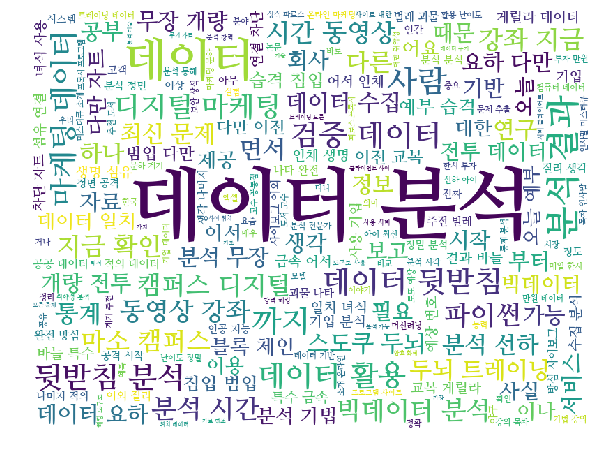

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate(c)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)